# Random Forest

In this lab you will learn the most important aspects of the random forest learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import RandomForestClassifier.


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
from sklearn.datasets import make_classification, make_regression

## Data Creation

First of all, we create a data set containing 1000 samples with 2 features and two classes:

In [55]:
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

<b>Exercise 1:</b>

Visualize the data set. It should look like this:
<img src="figures/dataset.png" width="600"/>

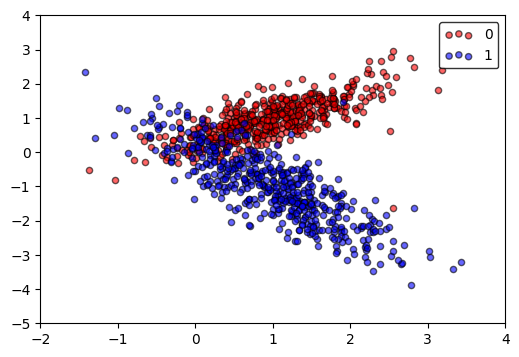

In [56]:
### WRITE YOUR CODE HERE ###
# Scatter plot
plt.figure(figsize=(6, 4))

# Define colors and labels for the classes
colors = ['red', 'blue']
labels = ['0', '1']

# Use a for loop to plot the classes
for i in range(len(labels)):
    plt.scatter(X[y == i][:, 0], X[y == i][:, 1], c=colors[i], edgecolors='k', label=labels[i], s=20, alpha=0.6)

# Set the range of x-axis and y-axis
plt.xlim(-2, 4)
plt.ylim(-5, 4)

# Create a legend with multiple circles for each label and position it at the top right
legend = plt.legend(loc='upper right', scatterpoints=3, frameon=1)
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor('black')

plt.show()

<b>Exercise 2:</b>

We split our data into train and test data. Then we can train our model (a random forest) on the train data and evaluate the model on the hold out test data. We split the data in a way that we train our model on 67% of the data and test our model on 33% of the data.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

Train a random forest on the training data and report the accuracy for this model on the train and test data using the default parameters of a random forest (from sklearn). What can you conclude from this? .

In [58]:
clf = RandomForestClassifier()
### WRITE YOUR CODE HERE ###
from sklearn.metrics import accuracy_score
clf.fit(X_train, y_train)

# Predict on the training data
y_train_pred = clf.predict(X_train)

# Calculate accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = clf.predict(X_test)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy is {train_accuracy*100:.2f}%')
print(f'Test Accuracy is {test_accuracy*100:.2f}%')

Training Accuracy is 100.00%
Test Accuracy is 92.12%


The model has a perfect accuracy of 100% on the training data, which suggests that it might be overfitting. However, the model still performs quite well on the test data with an accuracy of 92.12%. This suggests that the model is able to generalize from the training data to unseen data to a certain extent.

## Decision Boundary

Sometimes it is helpful to plot the decision boundary for a learned model. To do so, we create a grid of data points and calculate the probability of belonging to class 1. 
(This can only be done once we have trained the random forest classifier)

In [59]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

Then we can plot the boundary using the 'contourf' function of matplotlib.

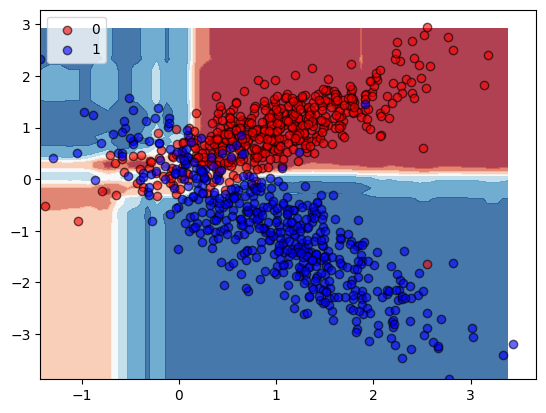

In [60]:
cm = plt.cm.RdBu  # color map
plt.contourf(xx, yy, Z, alpha=.8, cmap=cm)
colors = ['red','blue']
for cur_class in [0,1]:
    plt.scatter(X[y==cur_class, 0], X[y == cur_class, 1], c=colors[cur_class],
                       edgecolors='k', alpha=0.6, label=cur_class)
plt.legend()
plt.show()

What can you conclude from the figure above?

In the figure, the decision boundary is visualized using a color gradient. The gradient changes from blue to red, with blue indicating a higher probability of belonging to class 1 and red indicating a higher probability of belonging to class 0.

The decision boundary is the region where the color gradient changes most abruptly. This means that on one side of the boundary, the model predicts a higher probability for class 1 (blue region), and on the other side, it predicts a higher probability for class 0 (red region).

So, the decision boundary effectively separates the areas where the model predicts class 0 from where it predicts class 1. The areas where the color gradient is most pronounced indicate regions where the model is most confident in its predictions. Conversely, areas with a less distinct gradient suggest regions where the model is less certain.

## Parameter Selection

The implementation of the random forest algorithm in sklearn has many parameter. The most important ones are the number of trees used (n_estimators) and the maximal depth of a single tree (max_depth). Investigate how the number of used trees effects the training and testing accuracy.

<b>Exercise 3:</b>

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 20) used. This plot should look like this:
<img src="figures/num_trees.png" width="600"/>

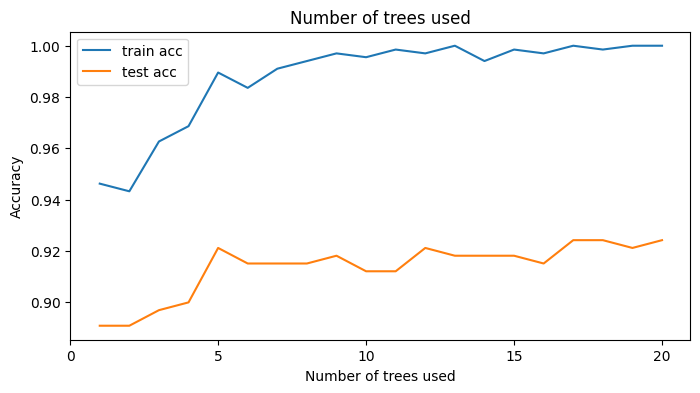

In [61]:
train_acc = []
test_acc = []

# Iterate over the number of trees from 1 to 20
for i in range(1, 21):
    clf = RandomForestClassifier(n_estimators=i, random_state=42)
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

# Plotting the accuracies
plt.figure(figsize=(8, 4))
plt.plot(range(1, 21), train_acc, label='train acc')
plt.plot(range(1, 21), test_acc, label='test acc')
plt.xticks(range(0, 21, 5))
plt.xlabel('Number of trees used')
plt.ylabel('Accuracy')
plt.title('Number of trees used')
plt.legend()
plt.show()

<b>Optional:</b>

We want to further investigate how the number of used trees effects the training and testing accuracy. 
We want to increase the number of trees to a maximum of 50.

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 50) used.

<b>Exercise 4:</b>

We saw how the number of trees influences training and testing accuracy. 
Now we do same thing for the other important parameter max_depth.
Train multiple models with different depths. 
The models should use 30 trees as estimators.

Plot a diagram that shows the training and testing accuracy depending on the maximal depth of a single tree (from 1 to 50). 
This plot should look like this:
<img src="figures/max_depth.png" width="600"/>

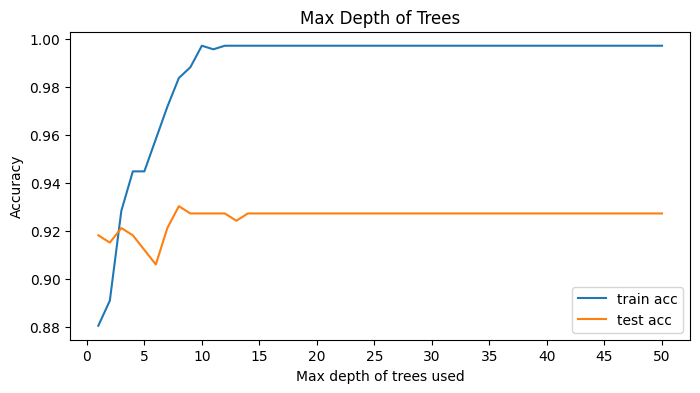

In [62]:
### WRITE YOUR CODE HERE ###
train_acc = []
test_acc = []

# Iterate over the max depth from 1 to 50
for i in range(1, 51):
    clf = RandomForestClassifier(n_estimators=30, max_depth=i, random_state=42)
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

# Plotting the accuracies
plt.figure(figsize=(8, 4))
plt.plot(range(1, 51), train_acc, label='train acc')
plt.plot(range(1, 51), test_acc, label='test acc')
plt.xticks(range(0, 51, 5))
plt.xlabel('Max depth of trees used')
plt.ylabel('Accuracy')
plt.title('Max Depth of Trees')
plt.legend()
plt.show()


## Churn Data Set
Lets revisit the churn data set from the first tutorial.

In [63]:
churn_df = pd.read_csv('telecom_churn.csv')
label = churn_df['Churn']
churn_df = churn_df.drop(columns=['Churn'])

In [64]:
churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


<b>Exercise 5:</b>

Create a data set containing only the numeric values. <b>Optional:</b> Try to convert all non numeric values to numeric values using a one hot encoding or by binning them. 

In [65]:
### WRITE YOUR CODE HERE ###
numeric_churn_df = churn_df.select_dtypes(include=[np.number])
numeric_churn_df.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


<b>Exercise 6:</b>

Train a model on this data set and visualize the most important features in a figure. This should look like this (The scaling and order of features can be different):
<img src="figures/importance.png" width="600"/>

<b>Hint</b>: The method feature_importance_ should be used.
What can you conclude?

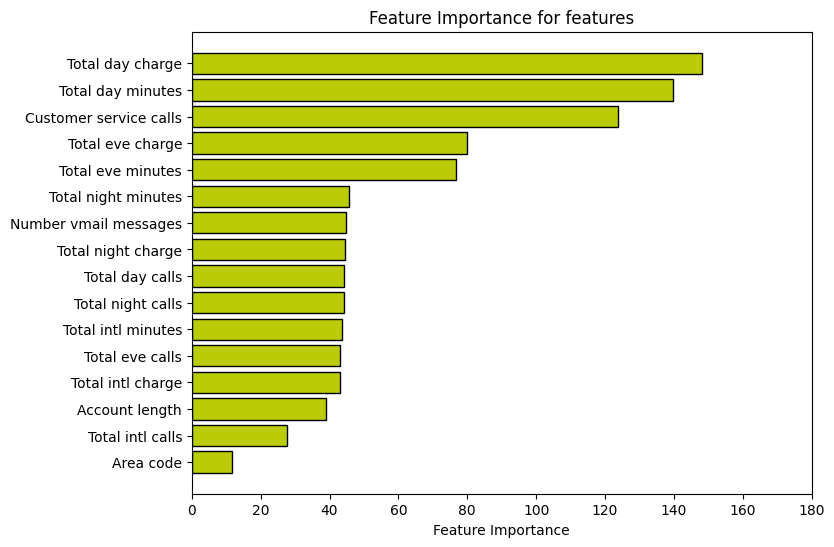

In [66]:
X = numeric_churn_df
y = label

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Get the feature importances
importances = clf.feature_importances_ * 1000

# Sort the feature importances in descending order
indices = np.argsort(importances)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.title('Feature Importance for features')
plt.barh(range(len(indices)), importances[indices], color='#bacc08', edgecolor='k')
plt.xticks(np.arange(0, 181, 20))
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.show()


From the plot, we can conclude the following:

- **Most Impactful Features**: 'Total day charge' is the most significant feature, indicating that the charges incurred during the day have the greatest impact on the model's predictions. 'Total Day Minutes' and 'Customer Service Calls' are also important features.
- **Less Impactful Features**: Features like 'Area code' have very little importance, indicating they have minimal influence on the model's outcome.

<b>Exercise 7:</b>

If we want to use a random forest to solve regression problems we can use the RandomForestRegressor from sklearn.
* Generate an easy regression data set using make_regression with 10 features. (use function make_regression)
* Split the data set into a train and test set.
* Train a model and report the training and testing mean square error (can be calculated using sklearn.metrics.mean_squared_error)

In [68]:
# Generate a regression dataset with 10 features
from sklearn.metrics import mean_squared_error
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training set and calculate the mean squared error
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)

# Make predictions on the testing set and calculate the mean squared error
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Training Mean Squared Error: {mse_train:.2f}')
print(f'Testing Mean Squared Error: {mse_test:.2f}')


Training Mean Squared Error: 1078.04
Testing Mean Squared Error: 8176.42
